# Matplotlib

## Overview

When working with large amounts of data, we will frequently want to visualize that data in some way.  There are many alternatives for this using Python, but as pointed out in the class discussion, matplotlib typically lies at the foundation of all of these.  In this lab, we will explore some of the fundamentals of matplotlib.  

## Goals

By the end of this lab, you should be able to:

 * Load arbitrary CSV or TSV data
 * Manipulate that data using numpy
 * Generate plots of data using matplotlib
 * Work with subplots using matplotlib
 
## Estimated Time: 45 - 60 minutes

First things first.  We know that we will be using numpy to work with our data, so let's start by importing it.

# Part 1: Getting the Data Loaded

# <img src="../images/task.png" width=20 height=20> Task 2.1

Please use the next cell to import the numpy package with the alias `np`.

In [1]:
import numpy as np

The `data` directory located in the root of the Jupyter Lab environment contains subdirectories for each day of the course.  Within these directories you will find a variety of data sources that we will use this week.  In this lab we will make use of the `web_traffic.tsv` file.  This file contains tab delimited data that looks something like the following:

| Hour | Number of unique hits |
|:----:|:---------------------:|
| 0.0  |  1590.0               |
| 1.0  |  2130.0               |
| 2.0  |  3221.0               |
| ...  |  ...                  |

To view this data, you can use the navigation on the left-hand side of Jupyter Lab to navigate to the data directory for *Day 1*, where you can then double-click on the TSV file to view it.

![Navigating to and opening `web_traffic.tsv`](../images/jupyter_navigation.png)

# <img src="../images/task.png" width=20 height=20> Task 2.2

Use the left navigation window in Jupyter Lab to browse to the *Day 1* data directory and open the `web_traffic.tsv` file as pictured above.

If you look closely at the data, you can see that Jupyter has incorrectly assumed that the first row of the data has column labels.  This isn't terribly important for us since we can load in the data regardless, but it is good to take note of.  Some of the other tools that we use (especially Pandas) can take advantage of the column names if they are present.

Numpy has a utility function, `genfromtxt()`, that can be used to load in arbitrary text data, which is converted into a numpy array.

# <img src="../images/task.png" width=20 height=20> Task 2.3

Use the cell below to print out the `help()` docstring for the numpy `genfromtxt()` function.


In [2]:
help(np.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes', *, ndmin=0, like=None)
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must retu

Take special note of the `delimiter` option in that help output:

> delimiter : str, int, or sequence, optional
>
>        The string used to separate values.  By default, any consecutive
>        whitespaces act as delimiter.  An integer or sequence of integers
>        can also be provided as width(s) of each field.

This option makes this function very flexible.  Whitespace is used by default, which suits our needs well.  Since our file is tab delimited, we won't need to specify the delimiter option.  However, if we had comma separated values, we could specify commas.  Alternatively, if we had fixed-width data, we can use either a single integer or a list of integers to specify the widths of each column.

# <img src="../images/task.png" width=20 height=20> Task 2.4

Use the `genfromtxt()` numpy function to load the `web_traffic.tsv` file found in the `../data/Day 1` directory.  When loading the data, load it into a numpy array named `data`.

In [3]:
data_file = "../data/Day 1/web_traffic.tsv"
data = np.genfromtxt(data_file)
print(data)

[[0.0000e+00 1.5900e+03]
 [1.0000e+00 2.1300e+03]
 [2.0000e+00 3.2210e+03]
 ...
 [2.1000e+01 1.6935e+04]
 [2.2000e+01 1.6337e+04]
 [2.3000e+01 1.5695e+04]]


Provided that any errors have been resolved, we should now have an array that contains our data.  Let's look at some metadata related to this array.

# <img src="../images/task.png" width=20 height=20> Task 2.5

Let's examine the numpy array that we have created.  Use the next cell to output the shape, dimensions, and content of the array.

In [5]:
print(data.shape) #Shape of the data
print(data.ndim)  #Dimentions   
print(data)

(744, 2)
2
[[0.0000e+00 1.5900e+03]
 [1.0000e+00 2.1300e+03]
 [2.0000e+00 3.2210e+03]
 ...
 [2.1000e+01 1.6935e+04]
 [2.2000e+01 1.6337e+04]
 [2.3000e+01 1.5695e+04]]


# Part 2: Working With the Data

Now that we have our data loaded, let's make some sense of it.  We can see that we have 744 rows, each of which is two columns wide.  The data, however, does look a bit strange.  By default, it's being displayed in scientific notation.  We can change that.

# <img src="../images/task.png" width=20 height=20> Task 2.6

Please print out the help for `np.set_printoptions` using the next cell.

In [6]:
help(np.set_printoptions)

Help on function set_printoptions in module numpy:

set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, suppress=None, nanstr=None, infstr=None, formatter=None, sign=None, floatmode=None, *, legacy=None)
    Set printing options.
    
    These options determine the way floating point numbers, arrays and
    other NumPy objects are displayed.
    
    Parameters
    ----------
    precision : int or None, optional
        Number of digits of precision for floating point output (default 8).
        May be None if `floatmode` is not `fixed`, to print as many digits as
        necessary to uniquely specify the value.
    threshold : int, optional
        Total number of array elements which trigger summarization
        rather than full repr (default 1000).
        To always use the full repr without summarization, pass `sys.maxsize`.
    edgeitems : int, optional
        Number of array items in summary at beginning and end of
        each dimension (default 

Of the many options available, let us draw your attention to the `suppress` option.  This option takes a boolean argument and allows us to choose whether or not to suppress scientific notation based on the magnitudes of the values in the array.  Another setting that can be very handy is the `precision` argument, which allows us to limit the number of decimal places.  We don't need that option right now, but it will come into play later in the course.

# <img src="../images/task.png" width=20 height=20> Task 2.7

Using the following cell:
 * Use the `np.set_printoptions()` utility function to suppress scientific notation.
 * Print the content of our `data` array again.

In [8]:
np.set_printoptions(suppress=True)
print(data)

[[    0.  1590.]
 [    1.  2130.]
 [    2.  3221.]
 ...
 [   21. 16935.]
 [   22. 16337.]
 [   23. 15695.]]


Let's make one more adjustment to our view.  Another of the `set_printoptions` options is `edgeitems`.  This option allows us to choose how many leading and trailing elements to display when the array data is summarized.

# <img src="../images/task.png" width=20 height=20> Task 2.8

Using the following cell:

 * Adjust the `edgeitems` setting to support 12 leading and trailing elements.
 * Print the content of our `data` array again.

In [9]:
np.set_printoptions(edgeitems=12)
print(data)

[[    0.  1590.]
 [    1.  2130.]
 [    2.  3221.]
 [    3.  4221.]
 [    4.  5171.]
 [    5.  5762.]
 [    6.  6180.]
 [    7.  7124.]
 [    8.  8100.]
 [    9.  9078.]
 [   10. 10107.]
 [   11. 10581.]
 ...
 [   12. 22432.]
 [   13. 21760.]
 [   14. 20801.]
 [   15. 20941.]
 [   16. 20406.]
 [   17. 19575.]
 [   18. 19255.]
 [   19. 17984.]
 [   20. 18111.]
 [   21. 16935.]
 [   22. 16337.]
 [   23. 15695.]]


As you are aware, our data currently consists of two columns; the first represents the hour of the day and the second represents the number of unique visitors to our website.  While it might be useful to graph this data as a series of *x* and *y* values, use your imagination to picture what that will look like.

Rather than showing us how the data tends to behave over the course of a month, we will end up graphing hits (*y* values) relative to hour of the day (*x* values).  While this might certainly be interesting for finding patterns of activity (we'll graph this out soon!), it's not quite what we're trying to see right now.  It turns out that there are some wonderful ways that we can manipulate numpy arrays quickly and easily.

### Slicing Numpy Arrays

Imagine we have an array that is created as follows:

```
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
x = x.reshape(4,2)
```

This will yield an array that looks like this:

```
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])
```

We can choose to access a row by dereferencing the row with square brackets:

```
print(x[0])
[0, 1]
```

We could also choose to access the second column of the first row like this:

```
print(x[0][1])
1
```

Alternatively, we can reference that same value as follows:

```
print(x[0,1])
1
```

**You should pause here and think about that.**  If you try that same notation with a Python list, you will receive an error.  The differences don't end here, though!  For example, if we defined a list as follows:

```
a = [[0, 1], [2, 3], [4, 5], [6, 7]]
print(a[:][1])
```

will output:

```
[2, 3]
```

Just in case you haven't seen it, using the `:` inside of square brackets allows us to specify a *slice*, or a starting and ending range of values.  Still, slicing with a second dereference doesn't do much more than what limit the first slice.  Let's try this again with numpy arrays.

Using a numpy array, we can do the following:

```
print(x[:, 0])
```

This translates to, "Take all of the values in the first dimension (the rows) and output the zeroeth element in the second dimension."  Said more plainly, for all rows, take the first column:

```
[0 2 4 6]
```

You might have been expecting to see rows of numbers, but keep in mind that we are manipulating arrays.  We have just sliced our array vertically, extracting all of the values in the first column.  We can apply this type of slicing along any axis of the array!

# <img src="../images/task.png" width=20 height=20> Task 2.9

Using the existing `data` array, create two slices.  The first slice should be a numpy array of all of the hours named `hours`.  The second slice should be an array of all of the web hit counts named `hits`.  Print out each array to verify that they are correct.


In [12]:
hours = data[:,0]
hits = data[:,1]

Looking at that hits data, you should notice that there are many values that contain `nan` rather than a number.  While NumPy is perfectly happy with this, other libraries (like matplotlib) will be much less happy.

# <img src="../images/task.png" width=20 height=20> Task 2.10

Whatever the cause of some of the fields being marked as "Not a Number", numpy has a function designed for fixing just this problem.  Considering the following from the numpy documentation:

> numpy.nan_to_num(x, copy=True, nan=0.0, posinf=None, neginf=None)
>
>Replace NaN with zero and infinity with large finite numbers (default behaviour) or with the numbers defined by the user using the nan, posinf and/or neginf keywords.
>
>If x is inexact, NaN is replaced by zero or by the user defined value in nan keyword, infinity is replaced by the largest finite floating point values representable by x.dtype or by the user defined value in posinf keyword and -infinity is replaced by the most negative finite floating point values representable by x.dtype or by the user defined value in neginf keyword.

This function can be used to force `nan` values to zero, but it also allows us to place limits to be used in the place of positively or negatively infinite values.

Use the next cell to replace all of the `nan` values with zeros.

In [13]:
hits = np.nan_to_num(hits)

Much better!  Matplotlib will thank us later.

# Part 3: Creating Graphs

We're finally up to creating graphs!  The first thing that we need to do is to load the `matplotlib` library.  More specifically, we need the `pyplot` portion of `matplotlib`.  By convention, we typically import this as `plt`.

# <img src="../images/task.png" width=20 height=20> Task 2.11

Use the next cell to `import` the `pyplot` module of the `matplotlib` library with the alias `plt`.

In [14]:
from matplotlib import pyplot as plt

Now that matplotlib is loaded, we can immediately graph our data!  Let's try it.

# <img src="../images/task.png" width=20 height=20> Task 2.12

Generating a graph can be as simple as calling the `plot()` function from pyplot and then calling the `show()` function.  Use the next cell to call the `plot()` function with the `hits` array as an argument.  After that, call the `show()` function from pyplot.

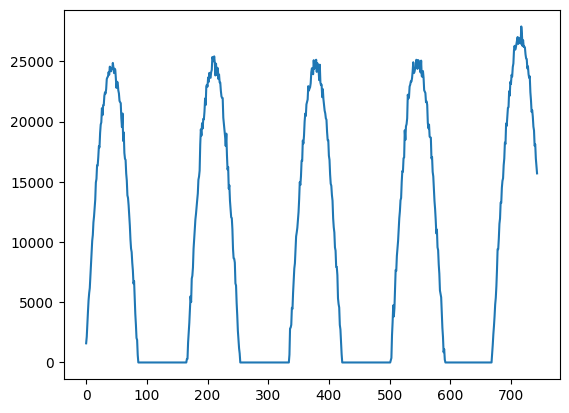

In [15]:
plt.plot(hits)
plt.show()

Instant graph!  Let's refine this a bit.  A few of the things that we would likely want to add immediately would be a title and some information about the axes.  When you begin generating a plot, you can use the `plt.title()` function to set the title for the plot.  You can also use the `xlabel()` and `ylabel()` functions to add titles to each of the axes.

# <img src="../images/task.png" width=20 height=20> Task 2.13

Create the plot again, this time titling it *"Unique Visitors / Hour."*  Add a label to the x-axis that reads *"Hour"* and a label to the y-axis that reads *"Visitors."*

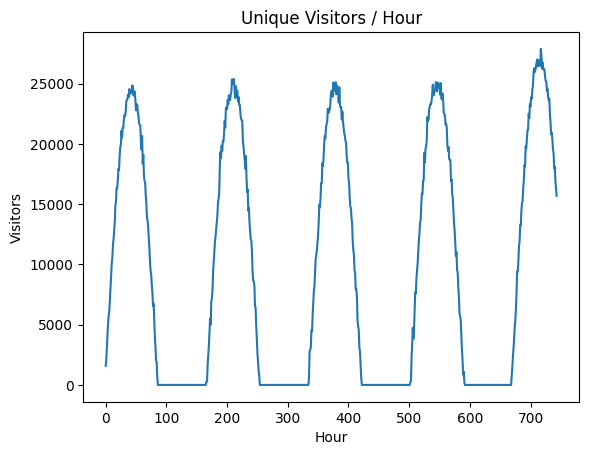

In [16]:
plt.plot(hits)
plt.title("Unique Visitors / Hour")
plt.xlabel("Hour")
plt.ylabel("Visitors")
plt.show()

Our graph so far is OK, but it could be better.  How many days are 744 hours?  How many weeks?  Wouldn't it be nicer to change the x-axis to represent days?  How can we do this.

We currently have more than 744 hours.  We know that each day is made up of 24 hours.  If we divide 744 by 24, we arrive at 31 days exactly.  How can we change the x-axis tick marks to show days, then?

One of the functions available on a plot is the `xticks` function.  This allows us to pass a list (or an array) of values that indicate where ticks should be placed.  It can accept a second argument that specifies the labels that should be attached to those tick marks.

# <img src="../images/task.png" width=20 height=20> Task 2.14

Revise your plot.  Change the x-axis so that it adds tick marks indicating each day, change the x-axis label to be "Day", and change the label for each tick mark to be the day number.

***Hint:*** The `range()` function in Python allows you to generate an iterable that will return a range of values.  For example, `range(10)` will iteratively return 0, 1, 2, 3...  `range(2,10)` will return 2, 3, 4, ...

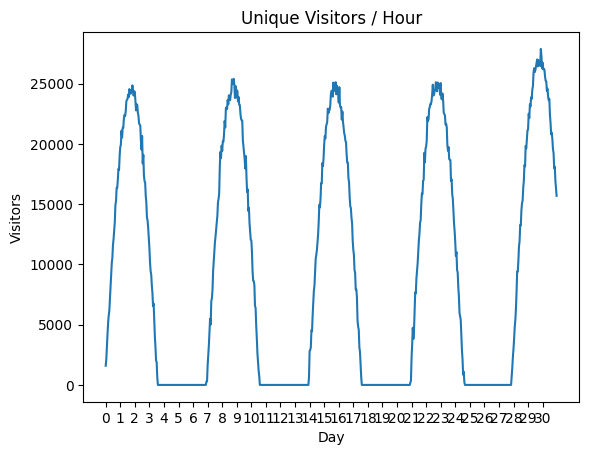

In [17]:
plt.plot(hits)
plt.title("Unique Visitors / Hour")
plt.xlabel("Day")
plt.ylabel("Visitors")
plt.xticks([i*24 for i in range(31)], [i for i in range (31)])
plt.show()

If you have completed the last task, you no doubt are noticing that your graph seems a bit squished.  We can fix this by changing the `figsize`, which is an attribute that can be set using the `figure()` function on the plot.  The `figsize` setting takes a tuple as a parameter, indicating the overall size in inches.  This can be a bit arbitrary since it will be dependent on your resolution, so it is typical to also pass a `dpi` setting to the `figure()` function.  For example, 

```
# Create a 10" by 2" plot at 300 DPI
plt.figure(figsize=(10, 2), dpi=300))
```

***It is very important to note*** that you must adjust the figure size *before* you generate the plot!  If you generate the plot and then attempt to change the size, it will not change the already generated plot even if you have not yet displayed it!

# <img src="../images/task.png" width=20 height=20> Task 2.15

Recreate your plot.  Resize the plot to be 12x6 at a DPI of 300.  Is the x-axis more readable?

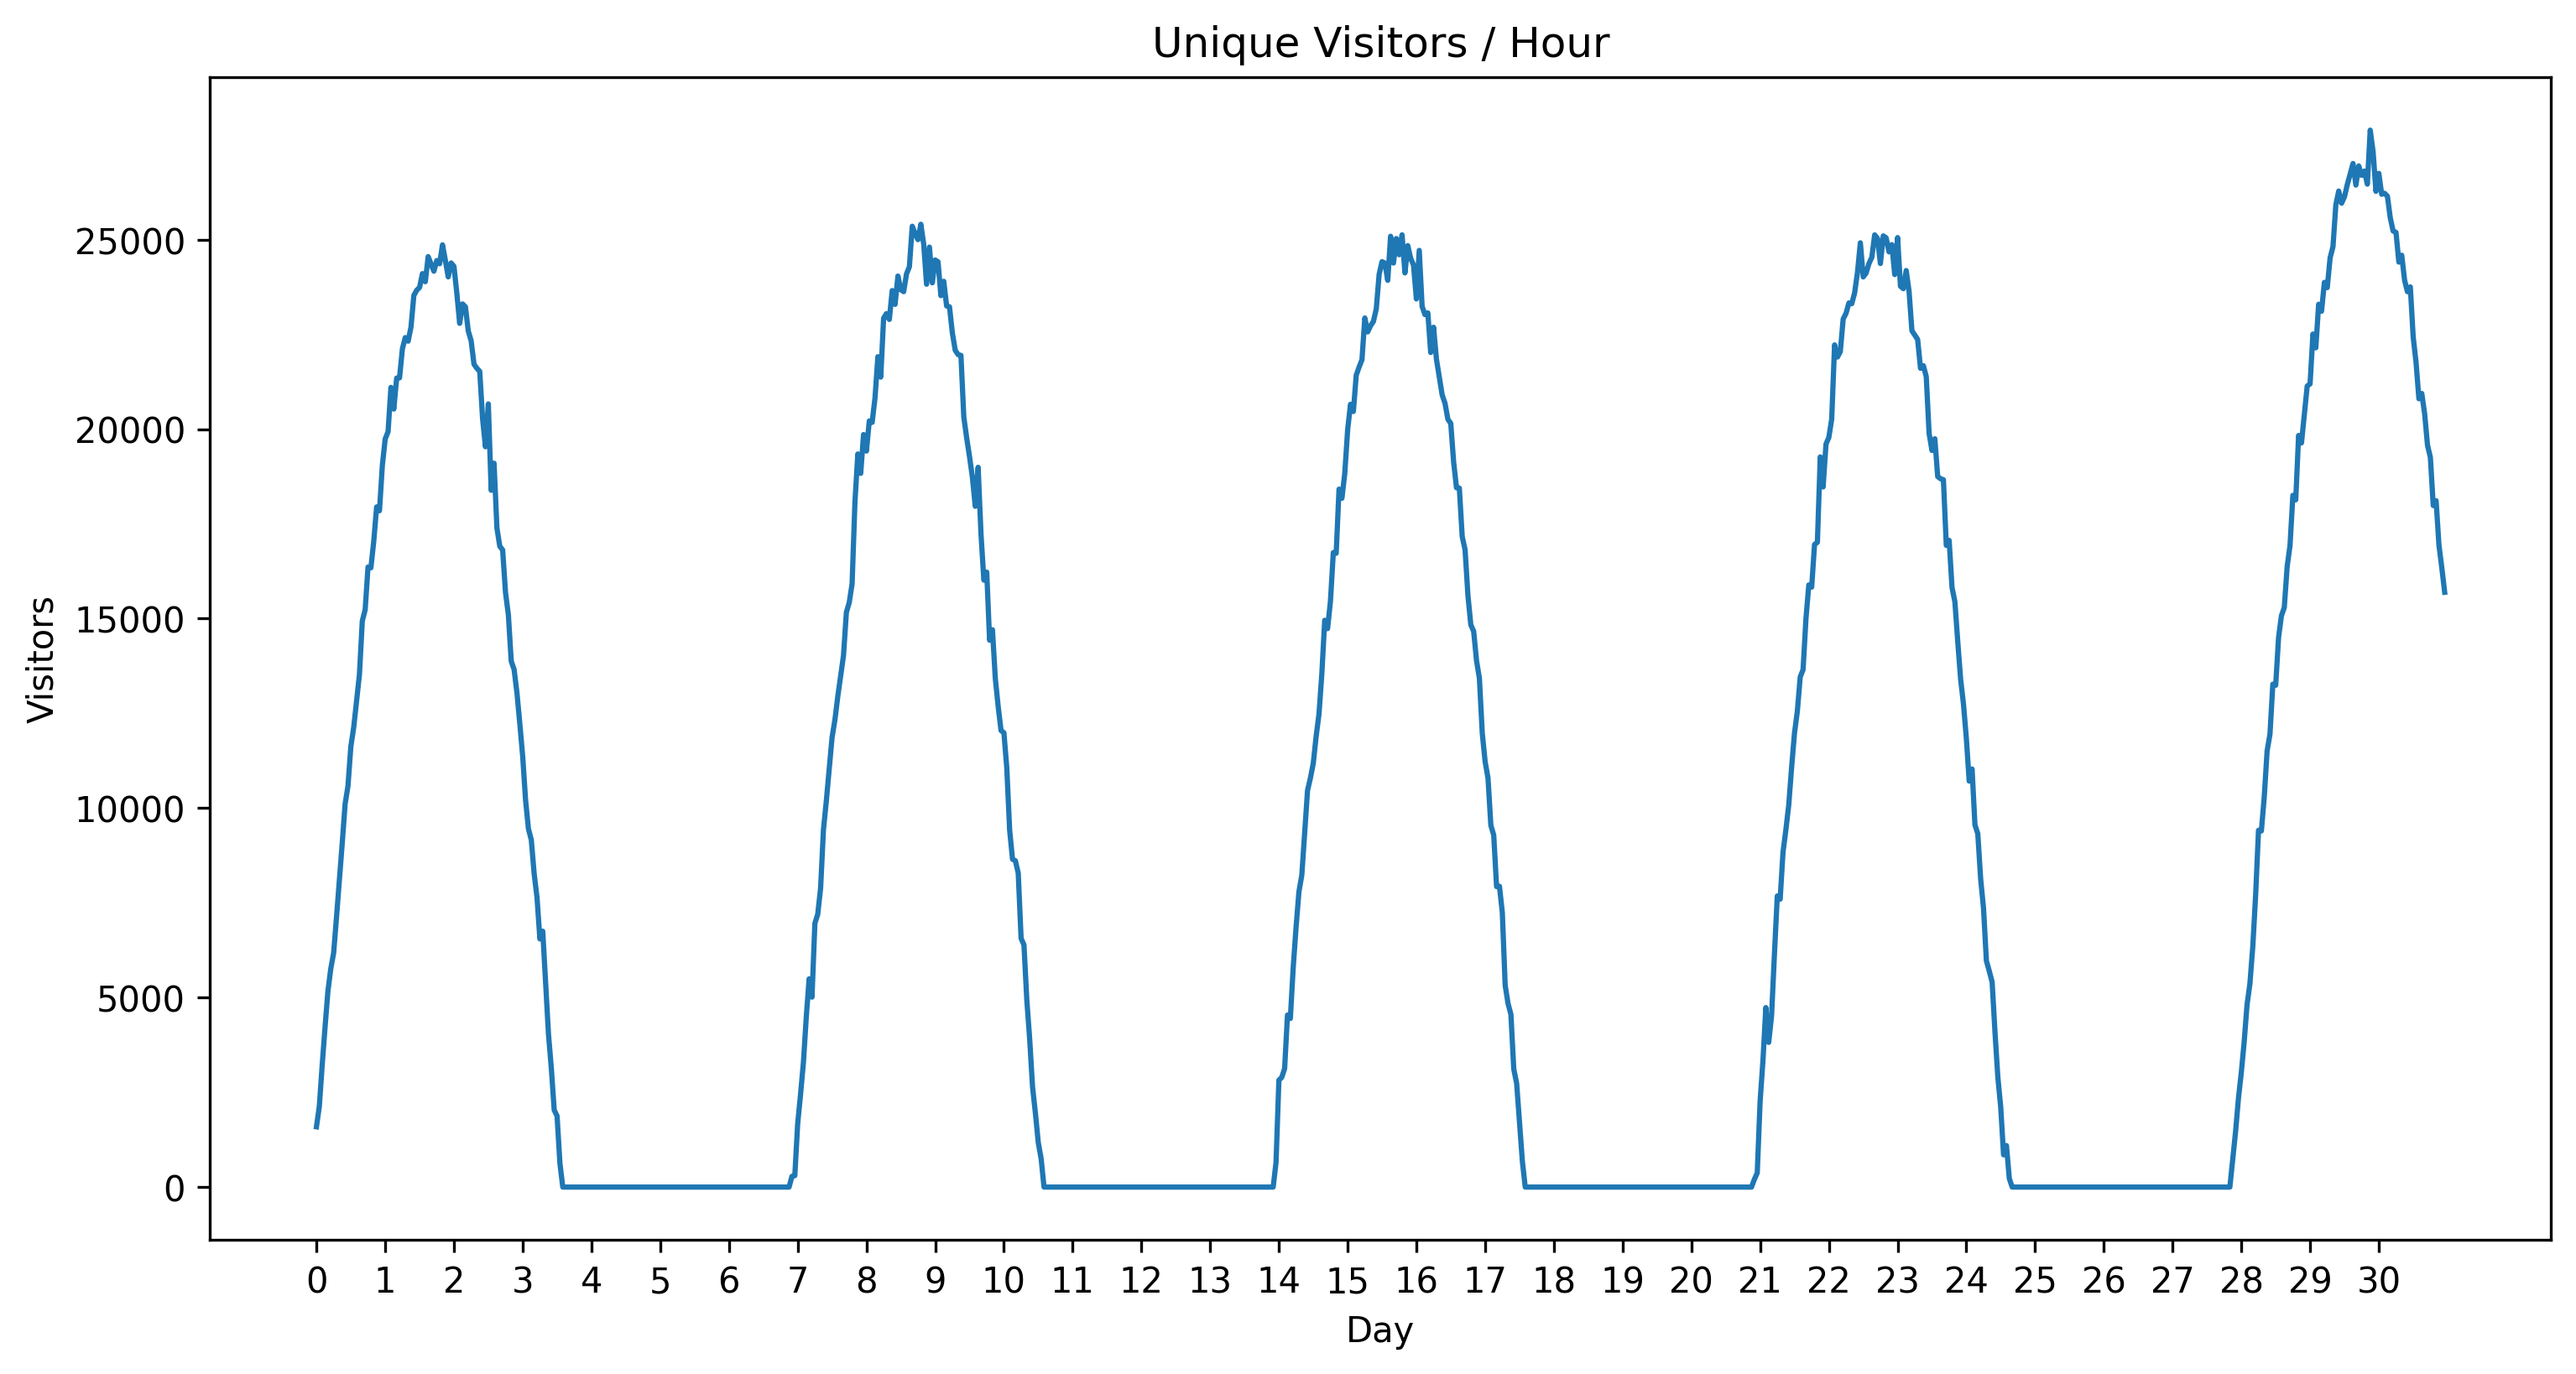

In [18]:
plt.figure(figsize=(12,6), dpi=300)
plt.plot(hits)
plt.title("Unique Visitors / Hour")
plt.xlabel("Day")
plt.ylabel("Visitors")
plt.xticks([i*24 for i in range(31)], [i for i in range (31)])
plt.show()

It would also be a bit easier to read the details of this graph if we added a grid to it.  We can do this with the `grid()` method for the plot.

# <img src="../images/task.png" width=20 height=20> Task 2.16

Recreate your graph.  Apply a grid to it.

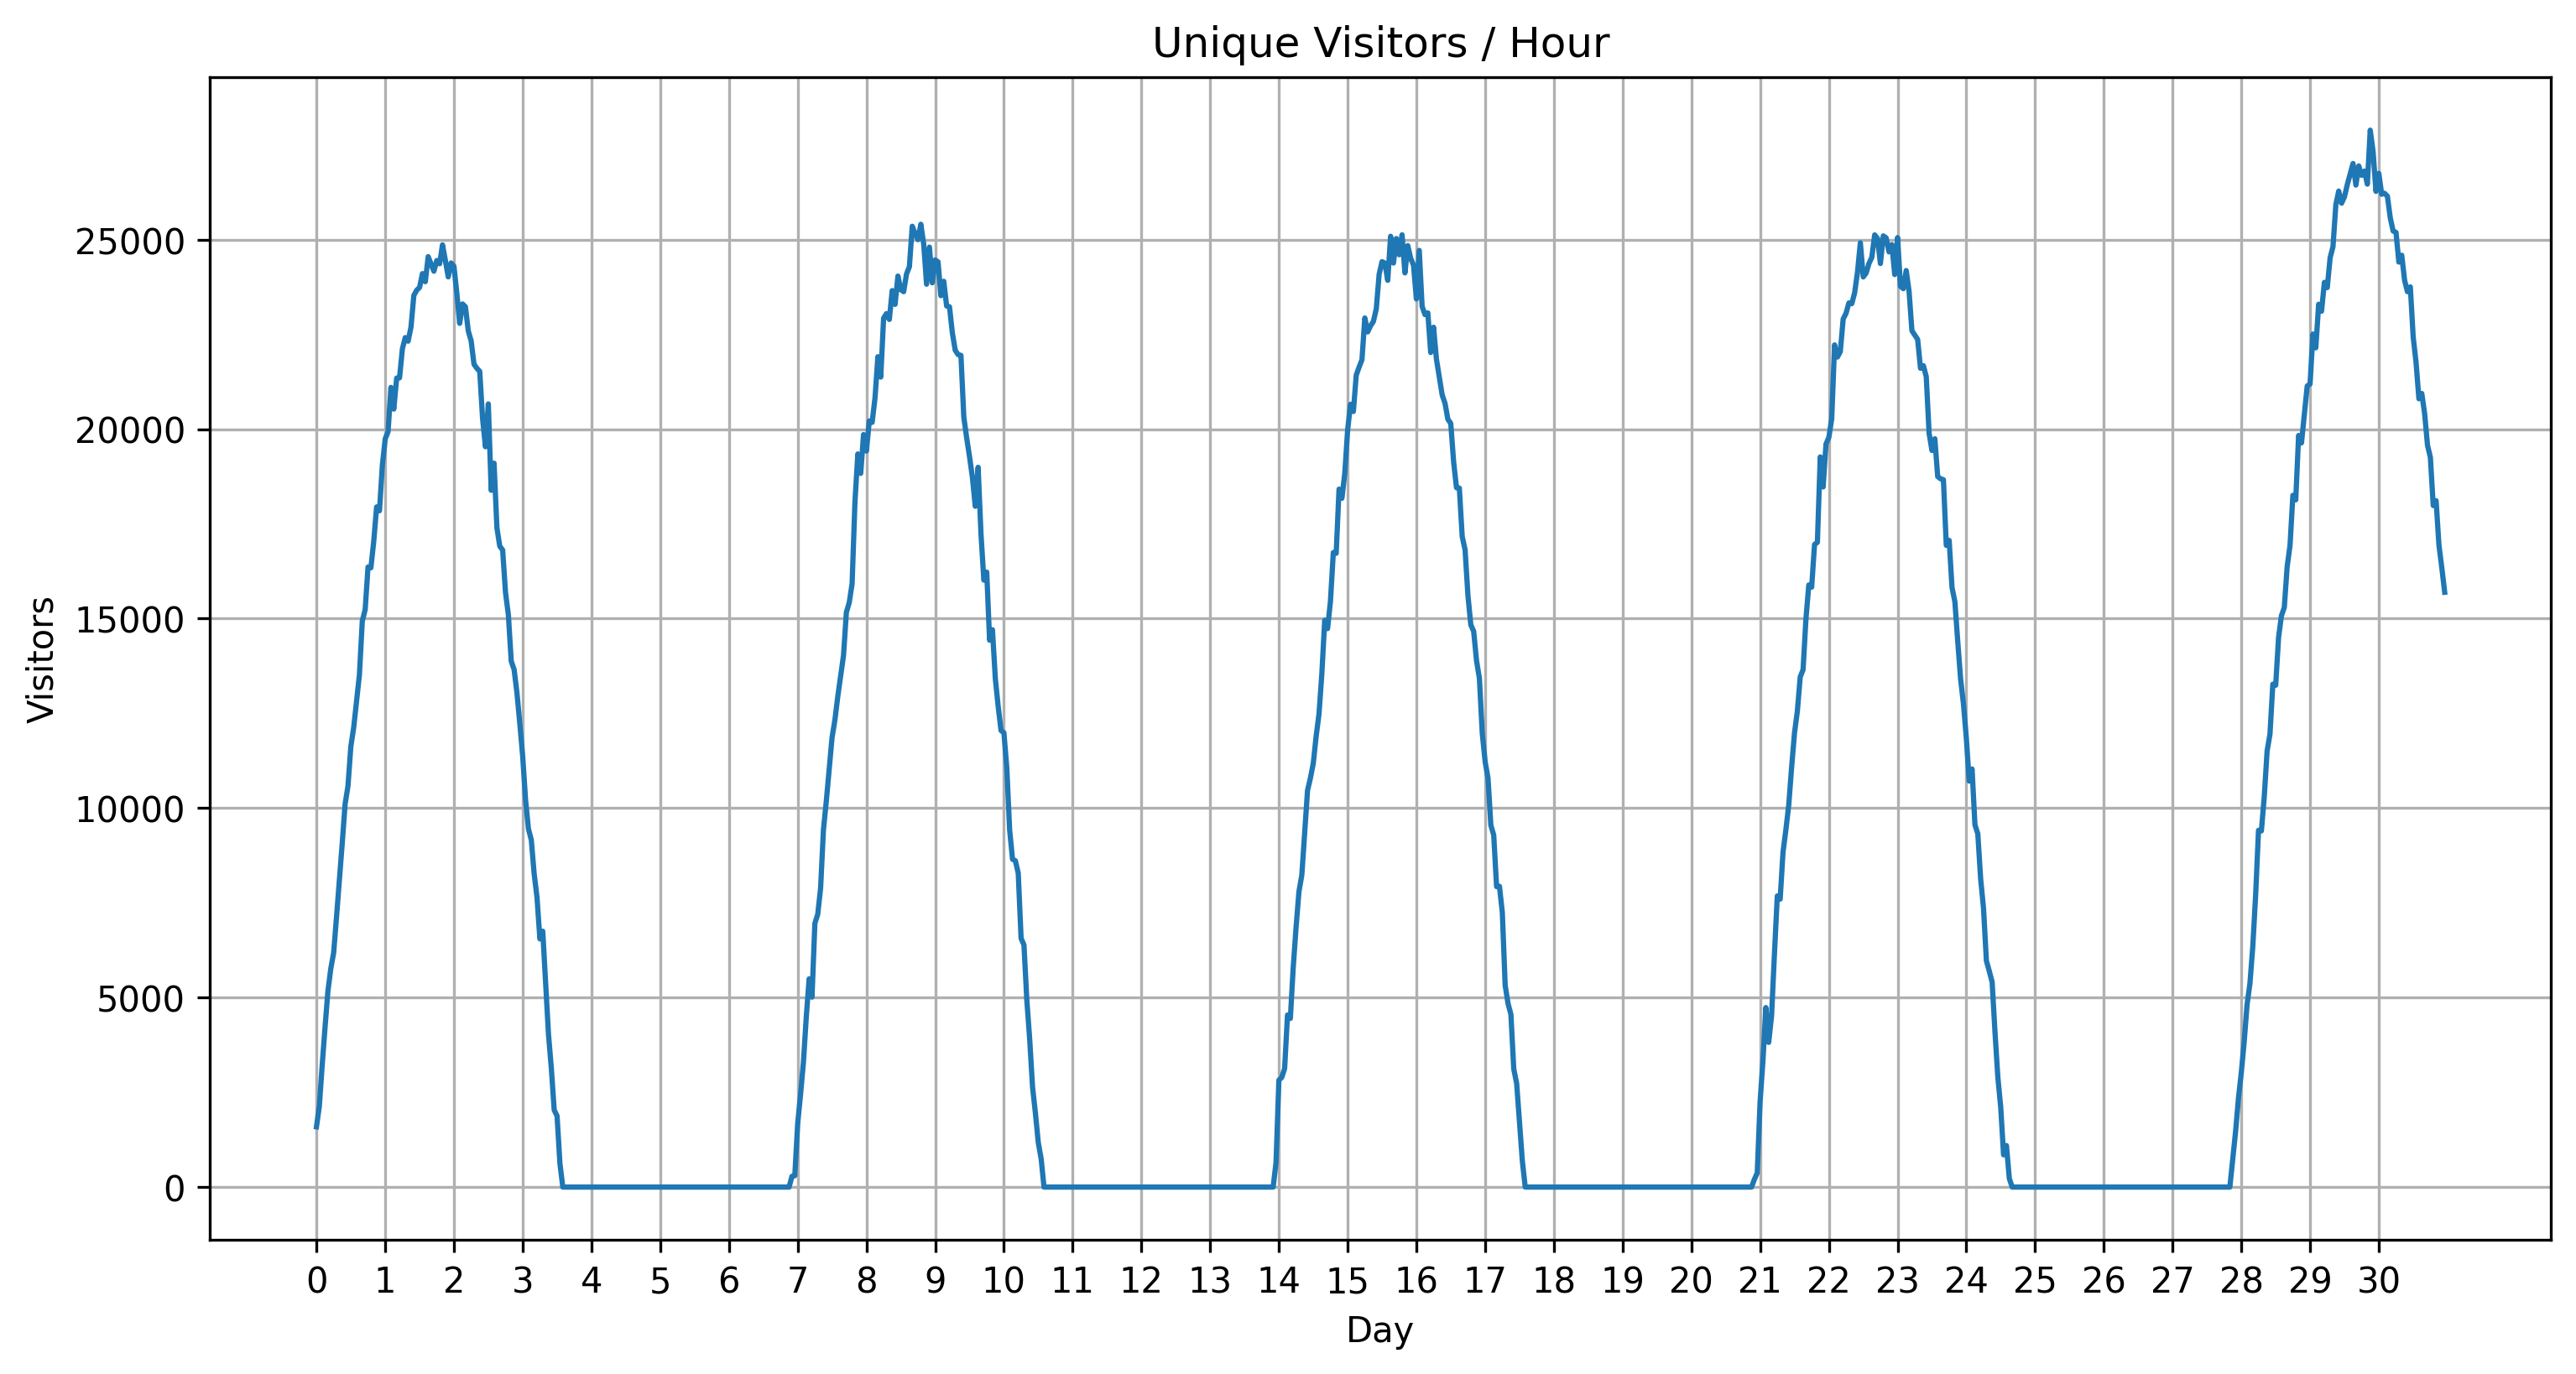

In [19]:
plt.figure(figsize=(12,6), dpi=300)
plt.plot(hits)
plt.title("Unique Visitors / Hour")
plt.xlabel("Day")
plt.ylabel("Visitors")
plt.xticks([i*24 for i in range(31)], [i for i in range (31)])
plt.grid() #here is how to add the grid to the plot
plt.show()

So far we have successfully created a line graph, which is the default.  There are many other possible types of graphs that we can create.  We will only look at two more for now.

The first of these is the scatter chart.  When generating a scatter chart, there are two ways to approach it.  The simplest is to pass a format string as an argument to the `plot()` function.  The format of this is borrowed from MATLAB (which is entirely out of our scope).  We have included a brief quick reference table below:

| Character | Description                          |
|:---------:|:-------------------------------------|
| .         | 1 point                              |
| ,         | 1 pixel                              |
| o         | circle                               |
| v         | downward triangle                    |
| ^         | upward triangle                      |
| <         | left triangle                        |
| >         | right triangle                       |
| 1         | tristar down                         |
| 2         | tristar up                           |
| 3         | tristar left                         |
| 4         | tristar right                        |
| s         | square                               |
| p         | pentagon                             |
| *         | star                                 |
| h         | hexagon (point on top)               |
| H         | hexagon (flat top)                   |
| +         | plus                                 |
| x         | x                                    |
| D         | diamond                              |
| d         | skinny diamond                       |
| \|        | vertical line                        |
| _         | horizontal line                      |
| -         | solid line style                     |
| --        | dashed line style                    |
| -.        | dash-dot line style                  |
| :         | dotted line style                    |
| b         | blue                                 |
| g         | green                                |
| r         | red                                  |
| c         | cyan                                 |
| m         | magenta                              |
| y         | yellow                               |
| k         | black                                |
| w         | white                                |

For example, we could use:

```
# Creates a red dashed line
plot(hits, '--r')
```

# <img src="../images/task.png" width=20 height=20> Task 2.17

Using the information above, generate your plot again.  This time, use the single dot (not pixel!) and red format characters to change to what appears to be a scatter plot.

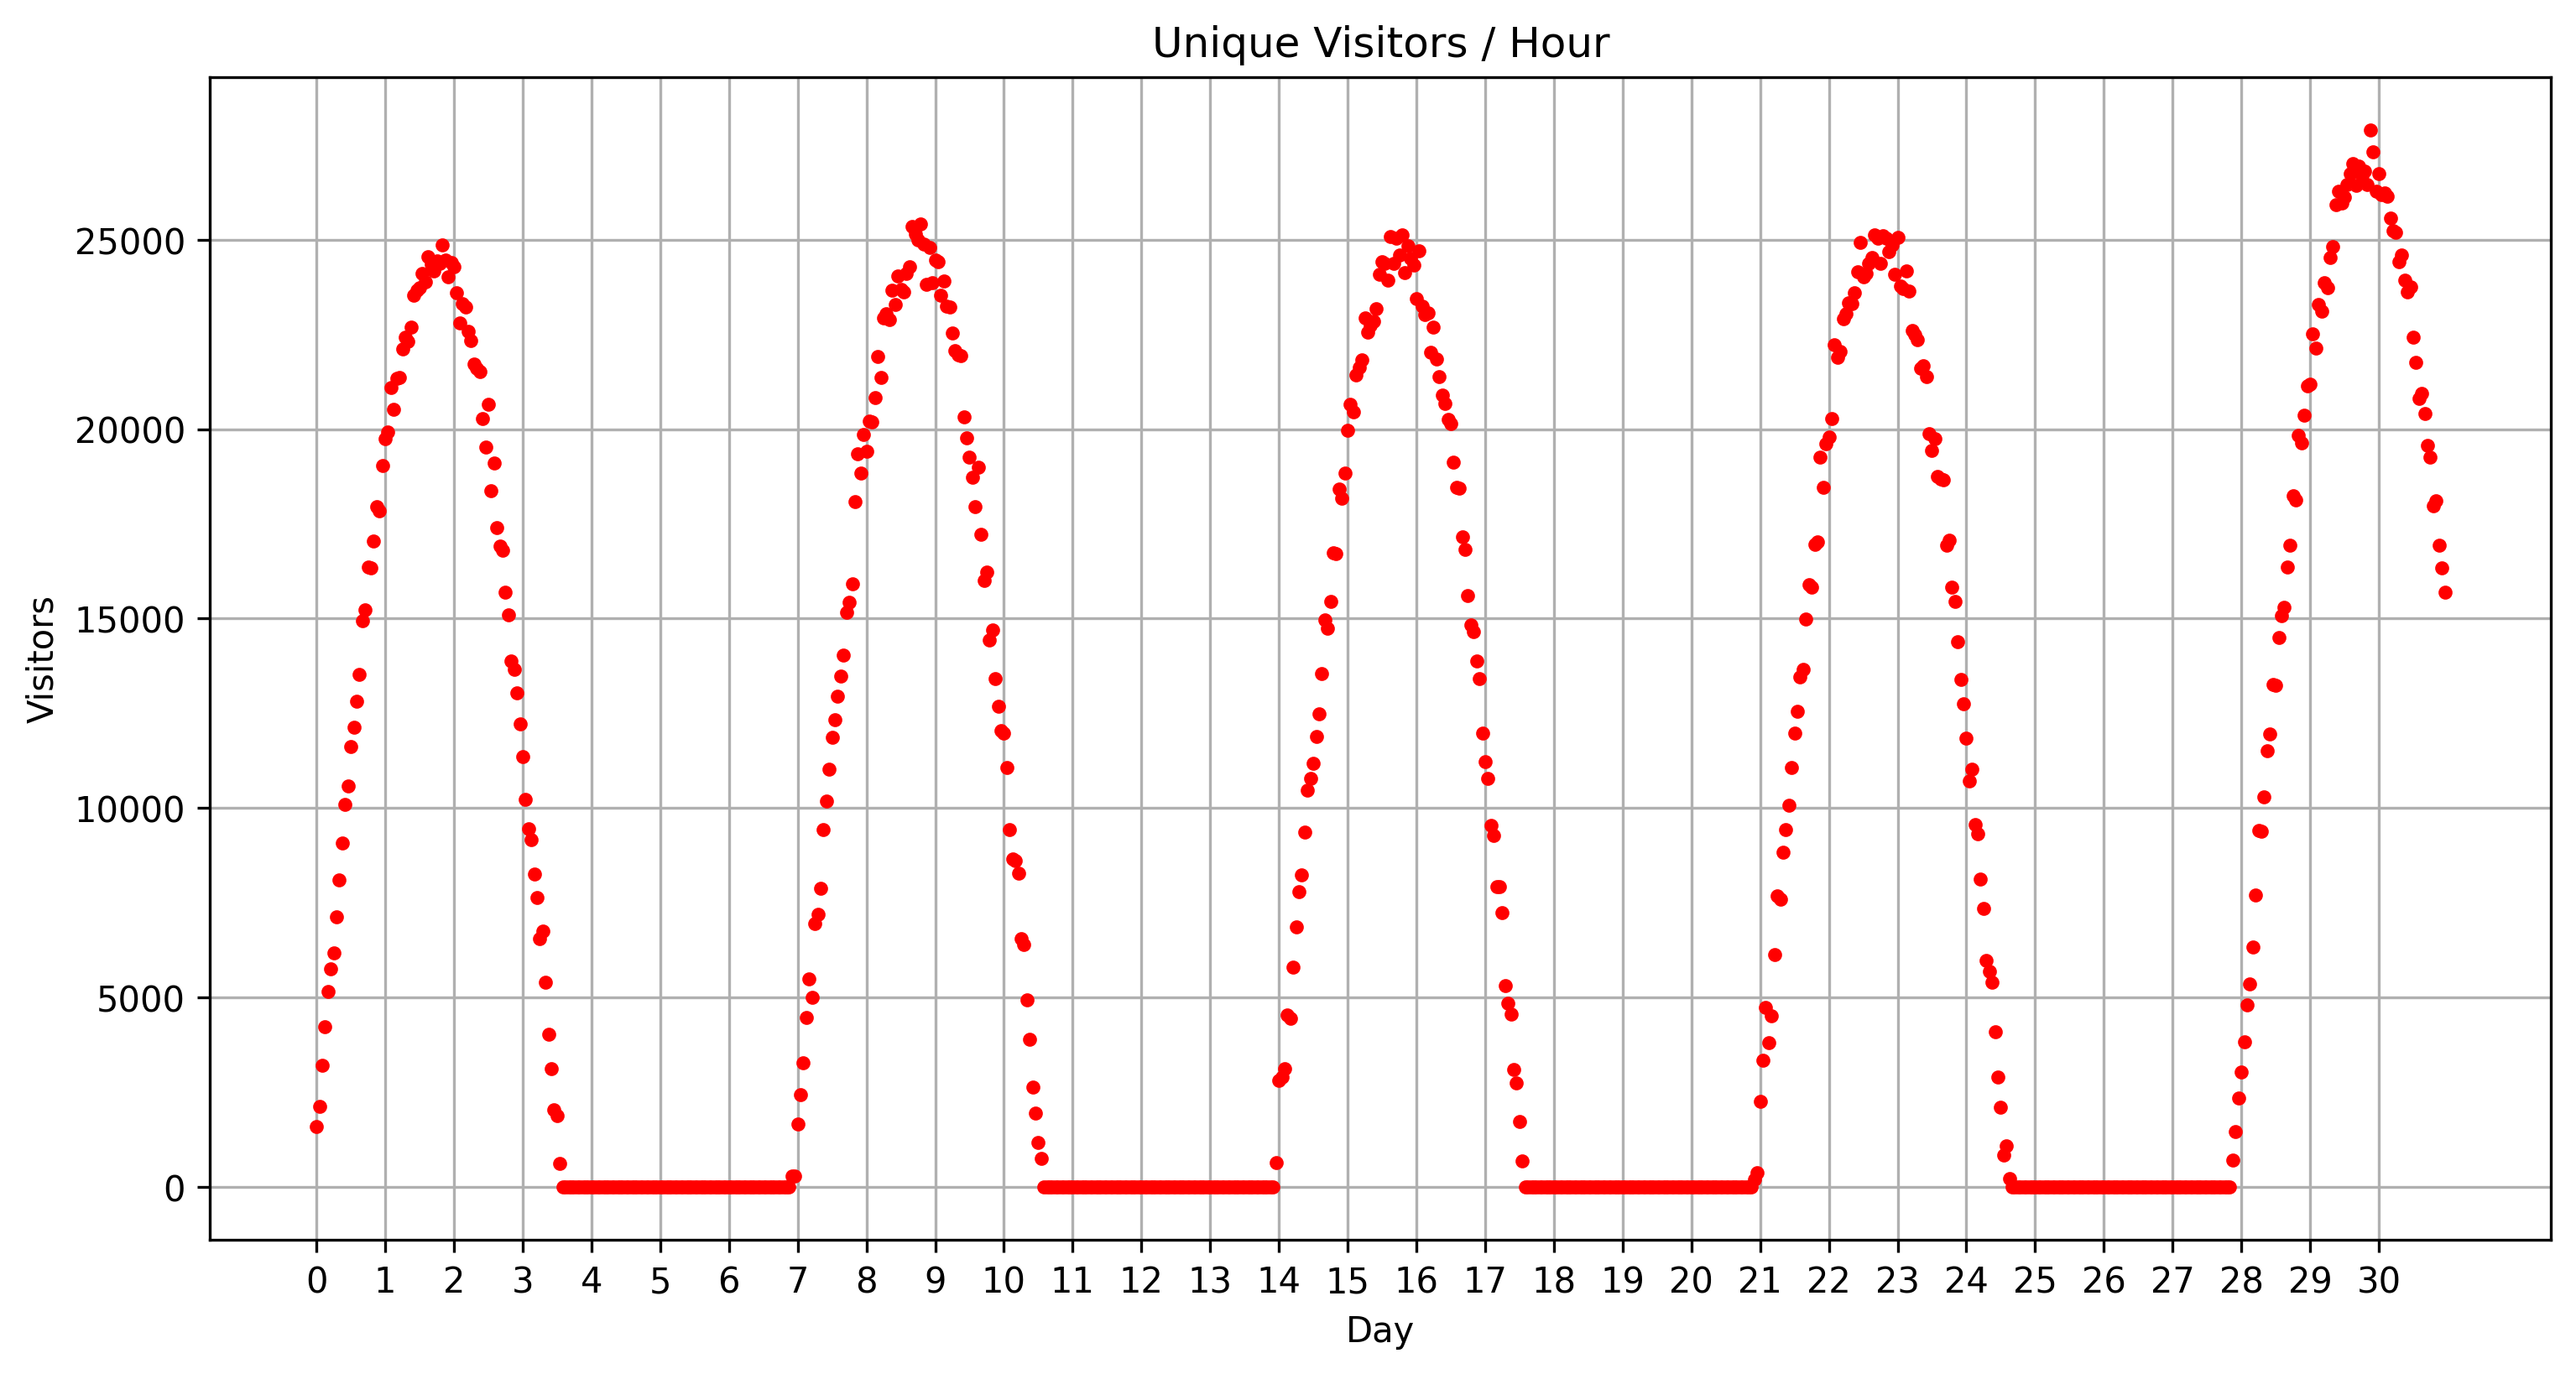

In [20]:
plt.figure(figsize=(12,6), dpi=300)
plt.plot(hits, ".r")
plt.title("Unique Visitors / Hour")
plt.xlabel("Day")
plt.ylabel("Visitors")
plt.xticks([i*24 for i in range(31)], [i for i in range (31)])
plt.grid() #here is how to add the grid to the plot
plt.show()

There is an alternate way to create a scatter plot.  We can use the `scatter()` function directly.

The `scatter()` function requires that we pass two arrays, one representing the x-axis and the other representing the y-axis.  Reasonably, both arrays must be of the same length.  There is also an `s` argument that we can pass to the `scatter()` plot function that allows us to specify the *size* of the points displayed.

# <img src="../images/task.png" width=20 height=20> Task 2.18

Recreate your graph, but this time use the `scatter()` graph function directly, setting the `s` size attribute to 1.  To do so, you will need to pass an array to represent the x-axis.  Can you work out how to do this with the `range()` function?

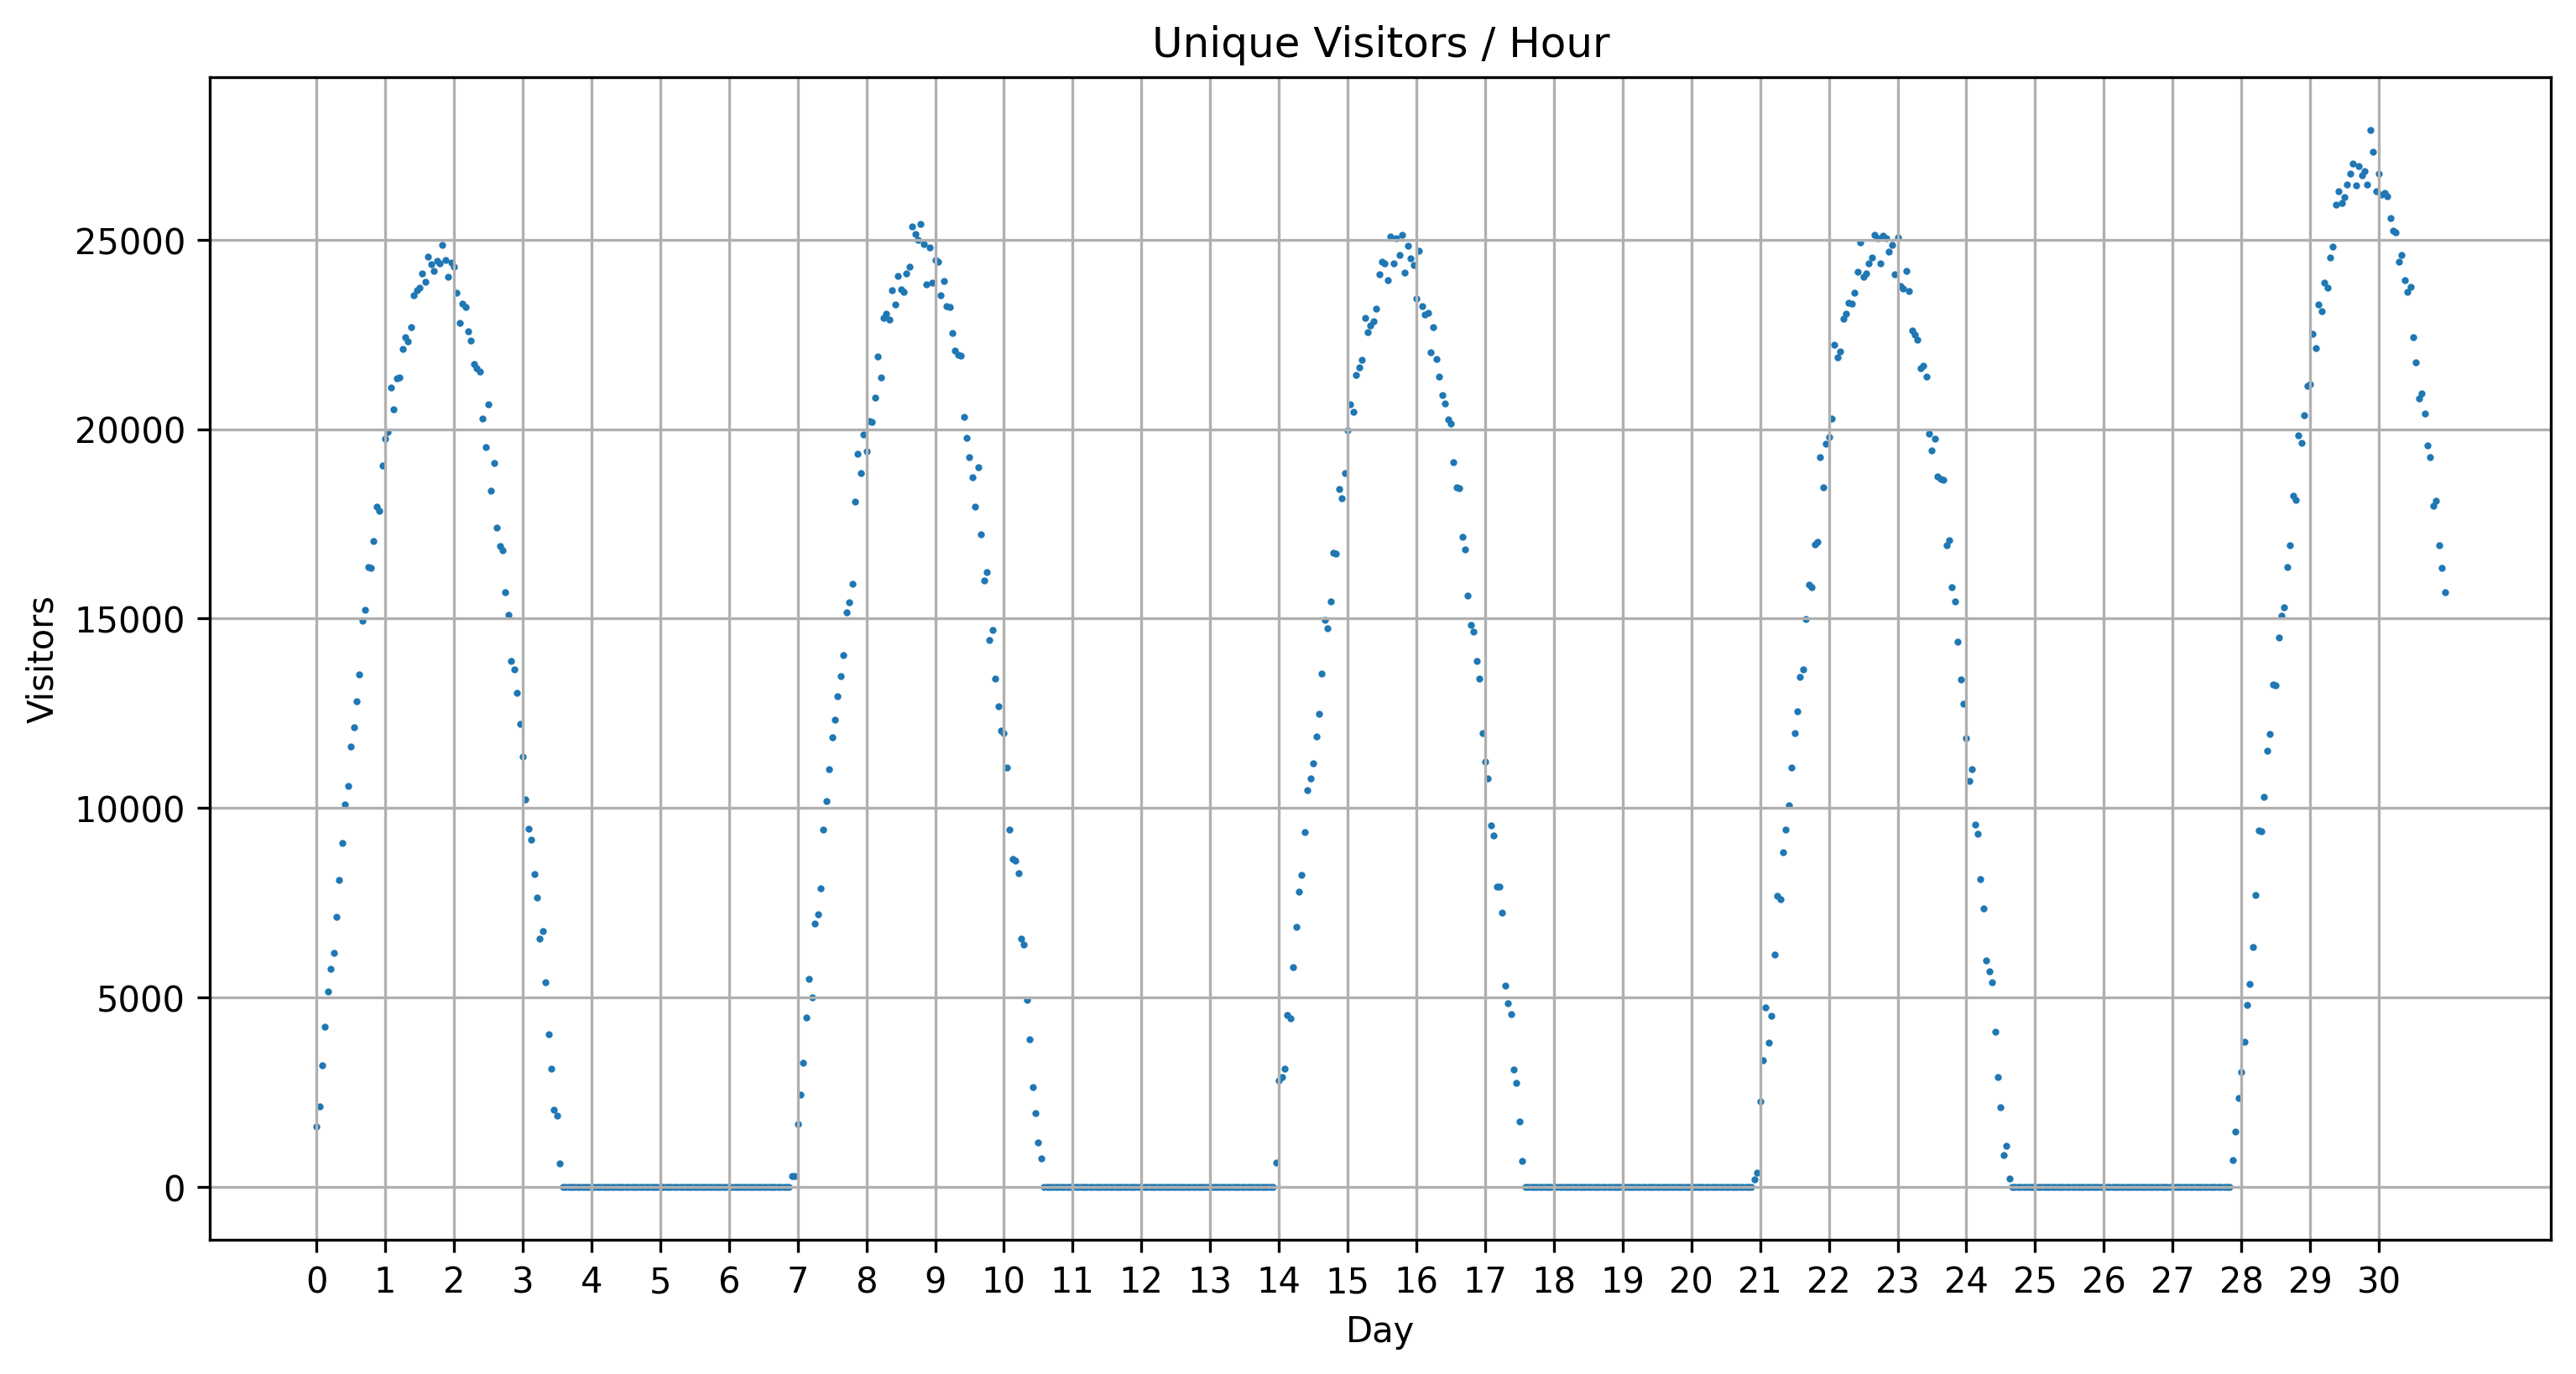

In [21]:
plt.figure(figsize=(12,6), dpi=300)
plt.scatter(range(0, len(hits)),hits, s=1)
plt.title("Unique Visitors / Hour")
plt.xlabel("Day")
plt.ylabel("Visitors")
plt.xticks([i*24 for i in range(31)], [i for i in range (31)])
plt.grid()
plt.show()

What we've done so far is good, but perhaps it would be more interesting to view the data in more of a "weekly" format.  Wouldn't it be handy if we could turn this data into a single graph with four or five subplots on it, each of which represents either a full or partial week?  Sure it would!

As we head down this path, you should also be reflecting on ways that you can make your life simpler.  One of the things that we should avoid doing when programming is repeating ourselves.  A common mantra in object oriented programming (and programming generally) is that we should write DRY code, where DRY mean s "Don't Repeat Yourself."  The simplest way to do this is with iteration.  A next likely step toward reducing duplication would be creating a function.

In case you don't remember (or have never created a Python function), it can be done as follows:

```
def my_function():
    print("This is my function!")
```

If we want to pass arguments to the function, we can just add them!

```
def my_function(x, y, z):
    print(f"This is my function that received {x}, {y}, and {z}")
```

The arguments `x`, `y`, and `z` above are *positional* arguments.  They are *required* in my function prototype.  We can also create keyword arguments and make arguments optional by assigning default values:

```
def my_function(x_pos_required, kw_arg_not_required="Nothing set"):
    print(f"This is my function!  The first arg is {x_pos_required} and the kw_arg_not_required is {kw_arg_not_required}.")
```

When calling this last function, we can call it a number of different ways:

```
my_function(10)
my_function(x_pos_required=10)
my_function(10, 20)
my_function(10, kw_arg_not_required='An arg!')
```

Note that it would *not* be legal to call it as:

```
my_function(x_pos_required=10, 20)
```

This is because positional arguments *may never* come after keyword arguments.

Still, this can be quite handy.  Rather than duplicating our graphing code again and again, we could create a function that will generate the graph for us!

## Subplots

Still, this doesn't solve the problem of generating subplots.  To do this, we must first call the `subplots()` method in pyplot with a scalar or tuple describing the layout.  For example, if we called `plt.subplots(5)` it would create 5 subplots.  If we called `plt.subplots(4,2)` it would generate a grid four rows high and two columns wide with a subplot in each cell.

When calling the `subplots()` function, a tuple is returned.  The first element is the figure itself.  The second is the array of subplots, frequently described as the "axes":

```
figure, subplots = plt.subplots(5,figsize=(8,14), dpi=300)
```
How can we set the title, axes, etc. for each subplot?  Unfortunately, there are some changes.  When we are a creating a single plot, there are helper functions like `title()` that conceal the details from us.  When we use subplots, we must dig a bit deeper.

##### set_title()

The `set_title()` function called on a subplot allows us to set a text label for the subplot title.

##### set_xlabel(), set_ylabel()

This pair of functions can be called on a subplot to set the label text for the corresponding axis.

##### set_xticks()

The `set_xticks()` function takes an array as an argument.  This array defines a list of positions at which tick marks should be drawn on the subplot.

##### set_xticklabels()

The `set_xticklabels()` takes an array of labels that should be placed on the corresponding tick marks from `set_xticks()`


Another small difference is that we do not want to call the `show()` function until we have finished generating all of the subplots.  If we call `show()` before this, our graph will be incomplete.


# <img src="../images/task.png" width=20 height=20> Task 2.19

Generate five subplots, each of which represents a single (or partial) week.  Within each subplot, generate a line graph representing the number of hits each hour.

Try to write your code in a more or less pythonic way, meaning that it would be better to use iteration and possibly functions rather than manually generating five subplots.

***Note:*** It is completely fine if you end up truncating a few hours of data off.  The purpose of this is integrating everything so far rather than playing "code golf" trying to solve a graphing problem with an odd number of elements in the most elegant way.  Also, do not be overly concerned if your subplots are a bit crowded.  We will address that next.

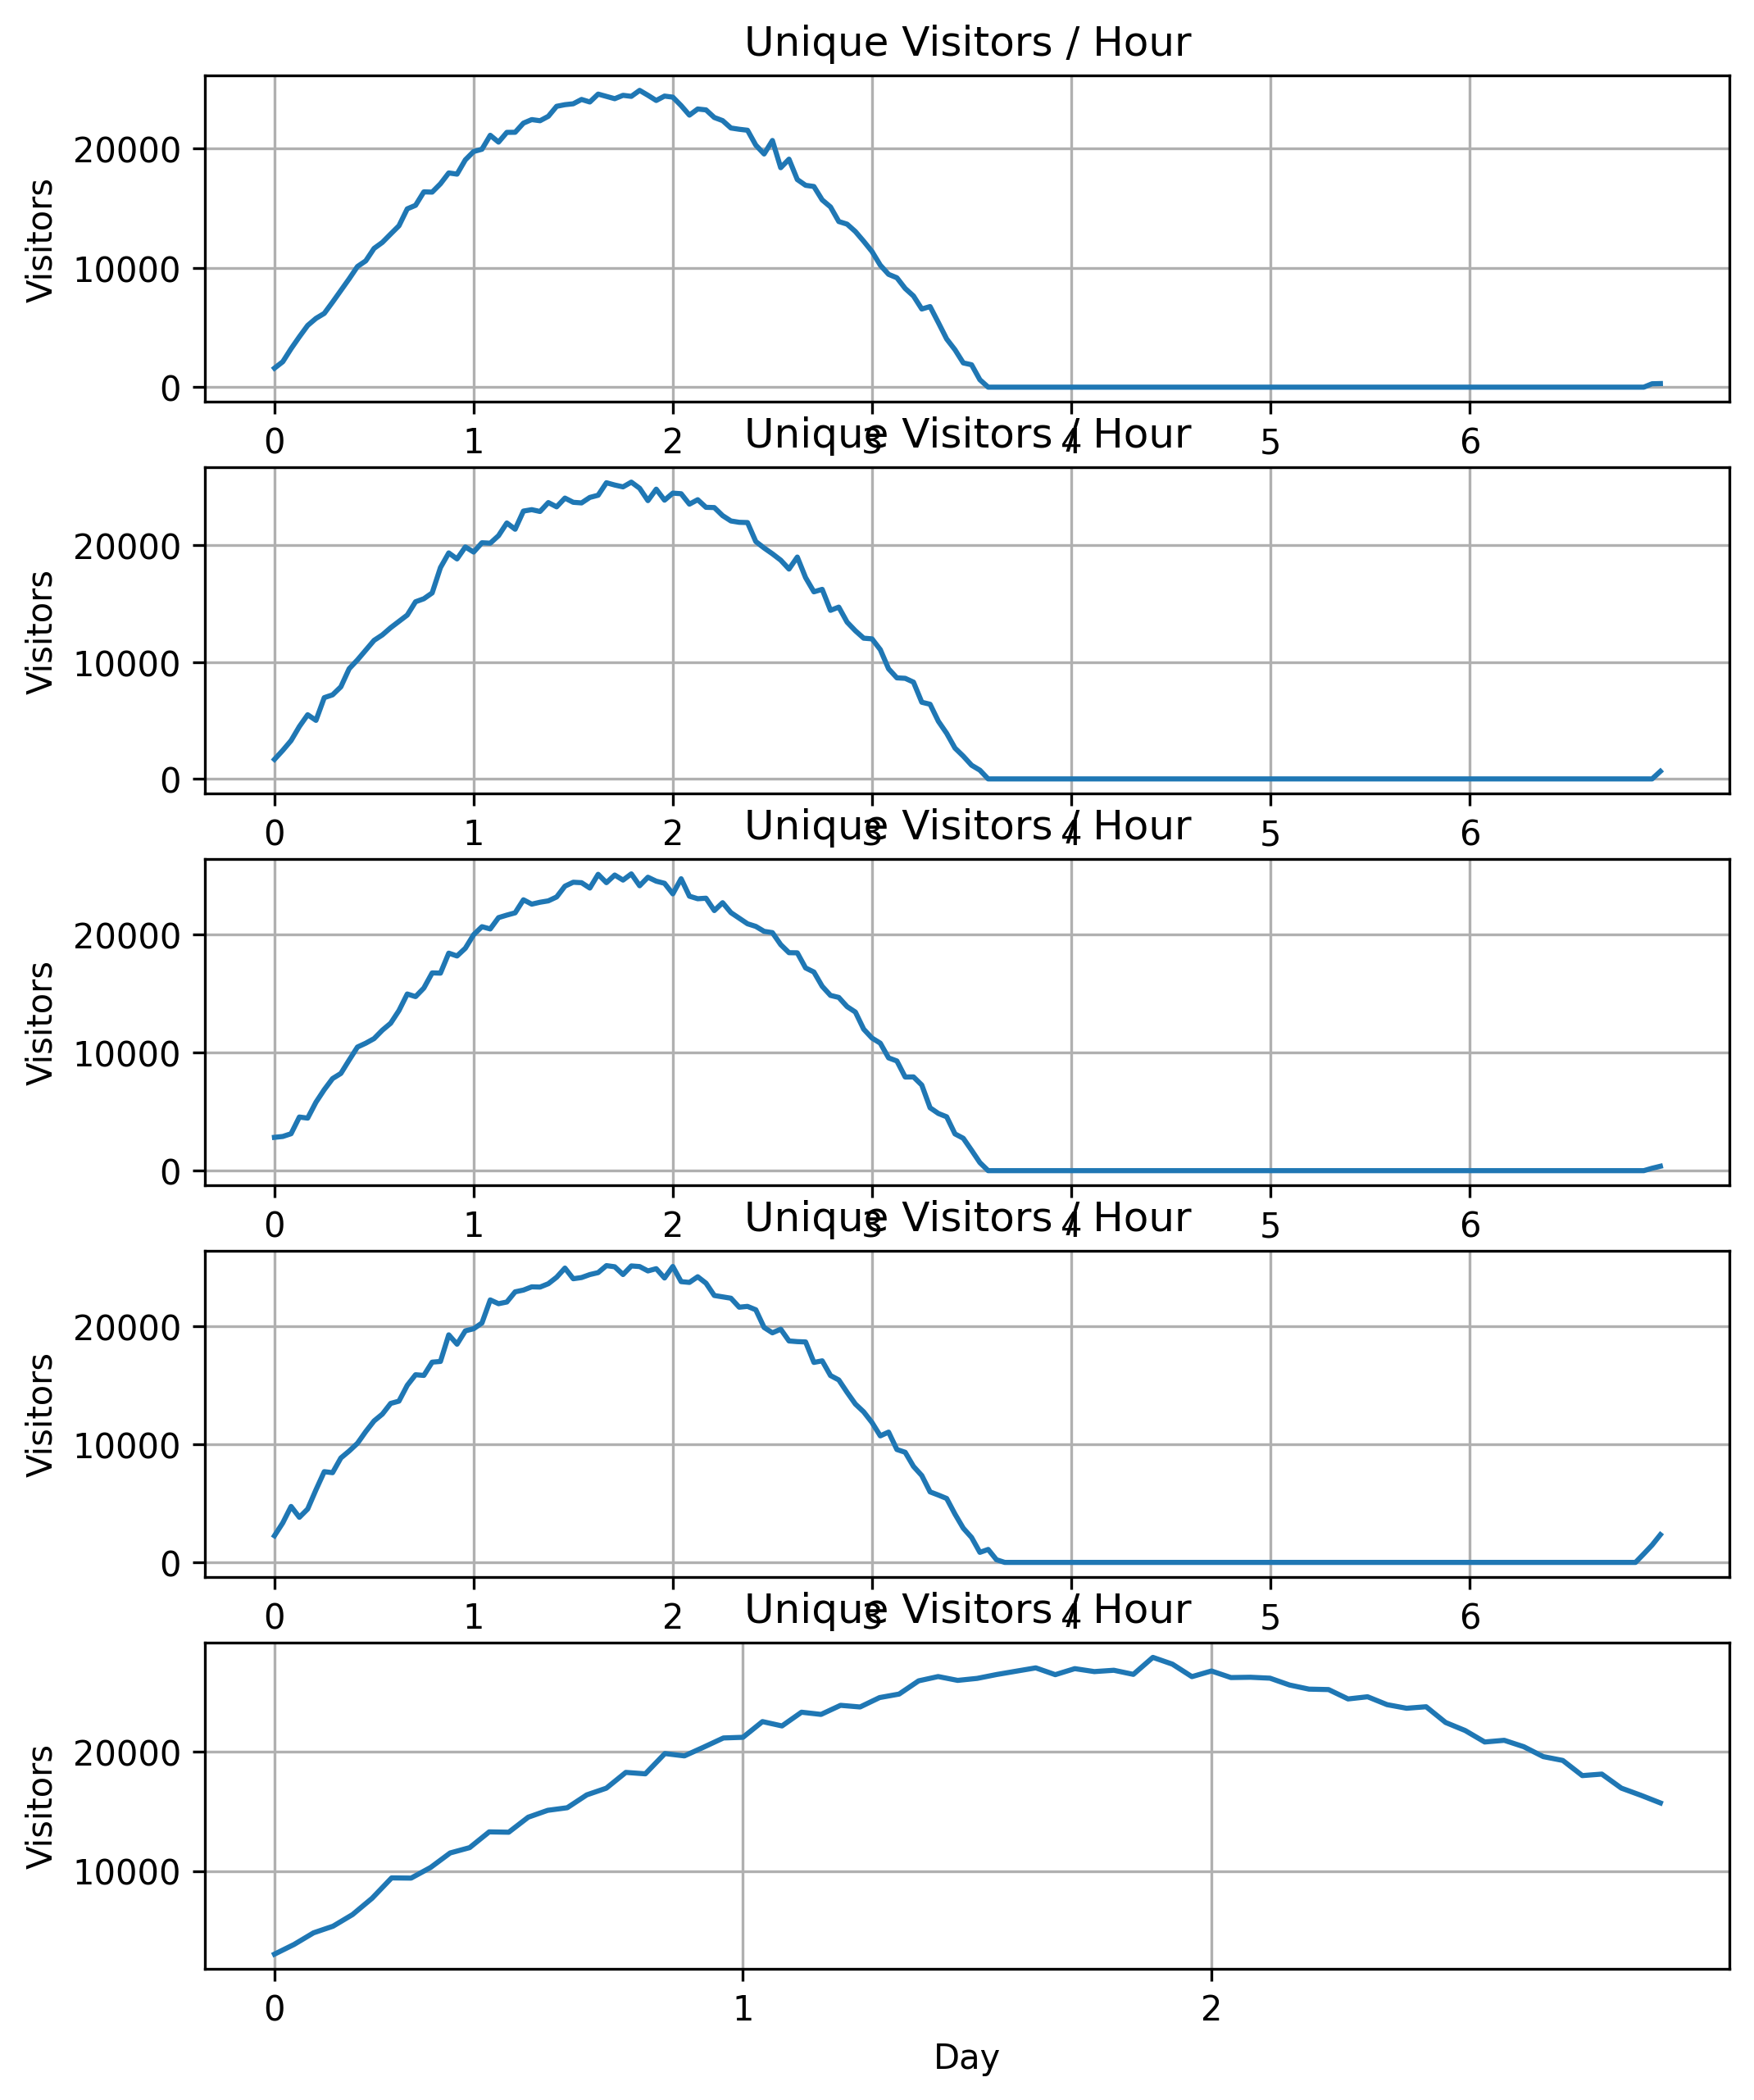

In [22]:
def draw_subplot(plt, data):
    plt.plot(data)
    plt.set_title("Unique Visitors / Hour")
    plt.set_xlabel("Day")
    plt.set_ylabel("Visitors")
    plt.set_xticks([i*24 for i in range(len(data)//24)])
    plt.set_xticklabels([i for i in range (len(data)//24)])
    plt.grid()

figure, subplots = plt.subplots(5,figsize=(8,10), dpi=300)
for i, subplot in enumerate(subplots):
    draw_subplot(subplot, hits[i*24*7 : (i*24*7)+(24*7)])
plt.show()


At this point you should have a series of subplots, each of which represents a complete week or partial week of web traffic.  The main difficulty at this point is that the subplots are quite crowded, intruding on subplot titles and axes.  The simplest way to address this is to use the `plt.tight_layout()` call on the entire plot before rendering it.

This function does take optional arguments that allow you to adjust the padding generally, or individually to the left, right, top, or bottom.  We will leave investigation of these options to you.

# <img src="../images/task.png" width=20 height=20> Task 2.20

Recreate your plot, this time calling the existing function that you defined in the last cell.  When rendering the subplots, use the `plt.tight_layout()` function to adjust the output.


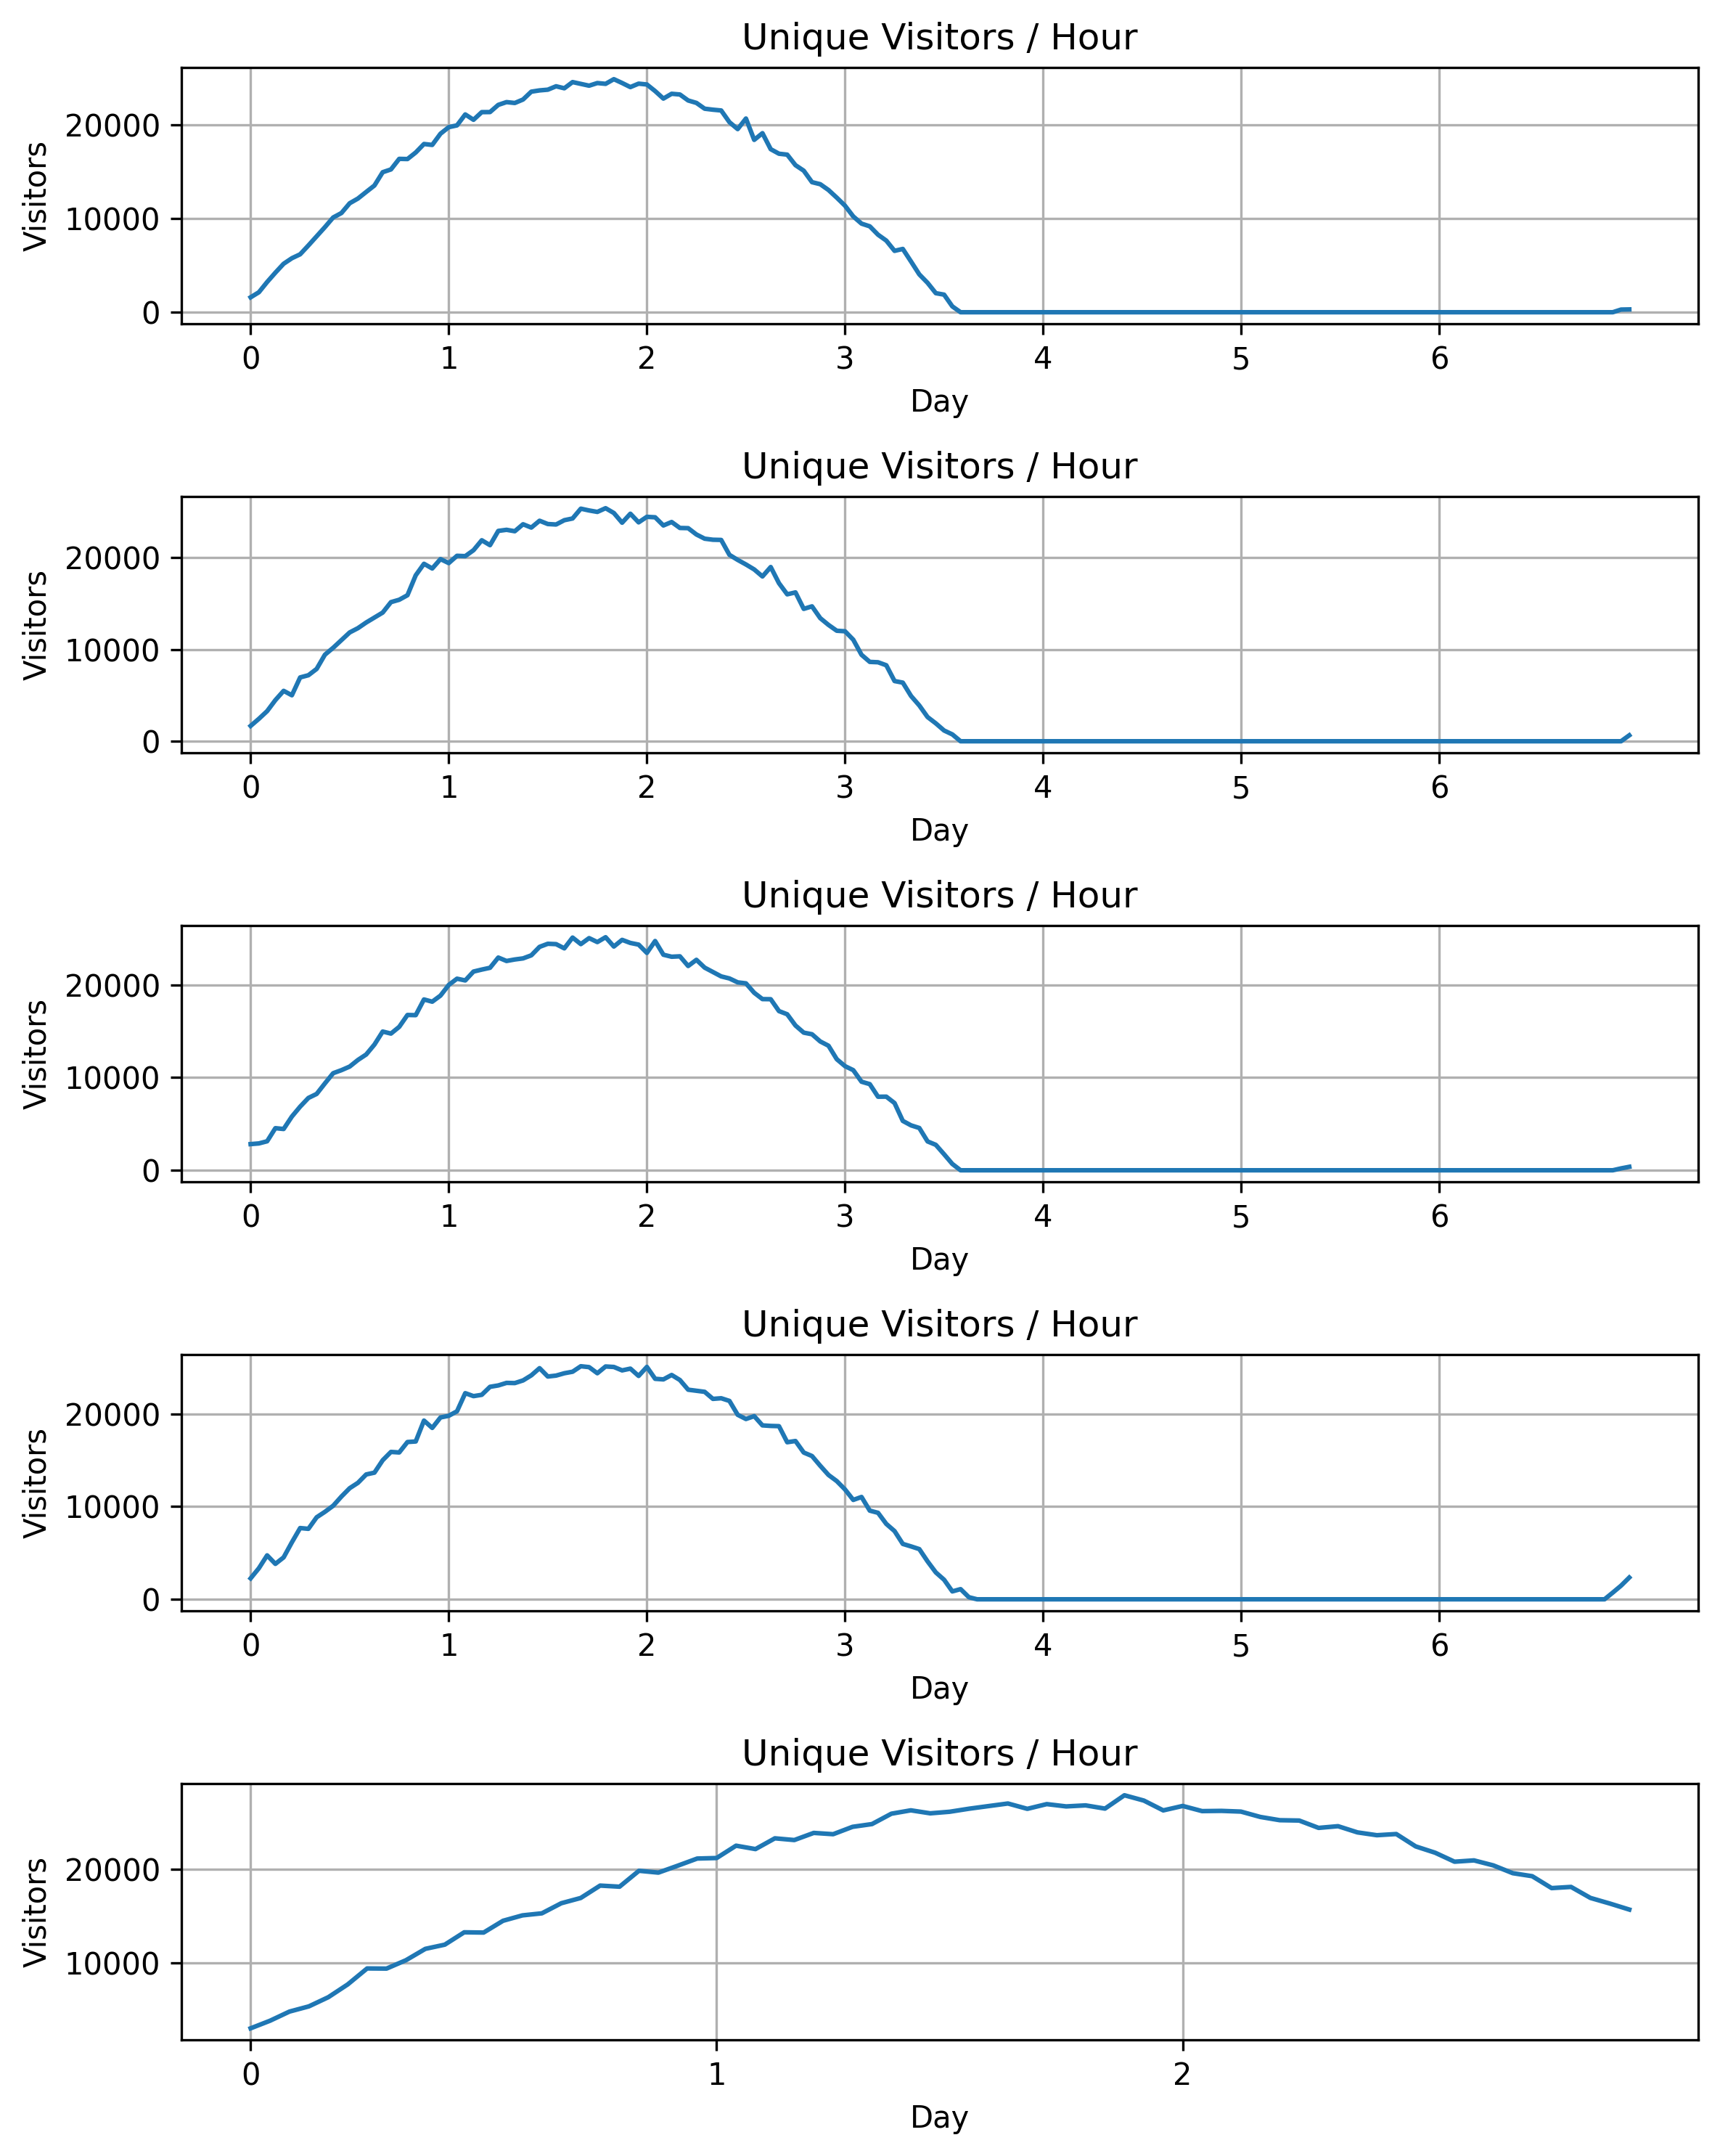

In [24]:
figure, subplots = plt.subplots(5,figsize=(8,10), dpi=300)
for i, subplot in enumerate(subplots):
    draw_subplot(subplot, hits[i*24*7 : (i*24*7)+(24*7)])
plt.tight_layout()
plt.show()

The very last example that we would like to examine with you is to examine what happens if we use the `hours` and `hits` arrays as-is to generate our graphs.

# <img src="../images/task.png" width=20 height=20> Task 2.21

The following cell graphs the `hours` and `hits` values as *x* and *y* coordinates.  Execute the cell and consider the output graph carefully and see if you can determine what has happened.

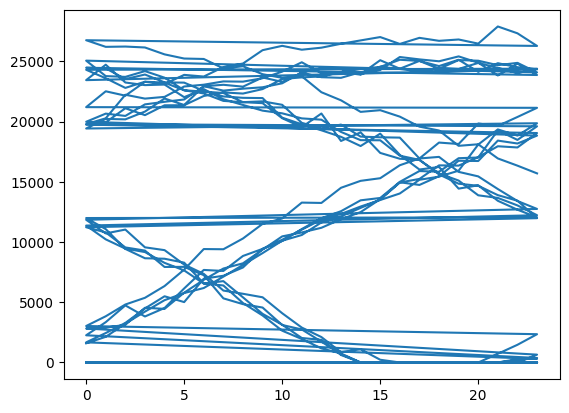

In [25]:
plt.plot(hours, hits)
plt.show()

Have you figured it out?  The x-axis is a big clue.

Since we are passing `hours` and `hits` as *x* and *y* values, we have *multiple hit values appearing at the same hour*.  Why does this happen?  Because the hours repeat!

It is possible that we might *want* this type of overlapping behavior.  Let's create one using the `stackplot()` function from pyplot.

# <img src="../images/task.png" width=20 height=20> Task 2.22

Execute the following cell and consider the output.  What is happening?

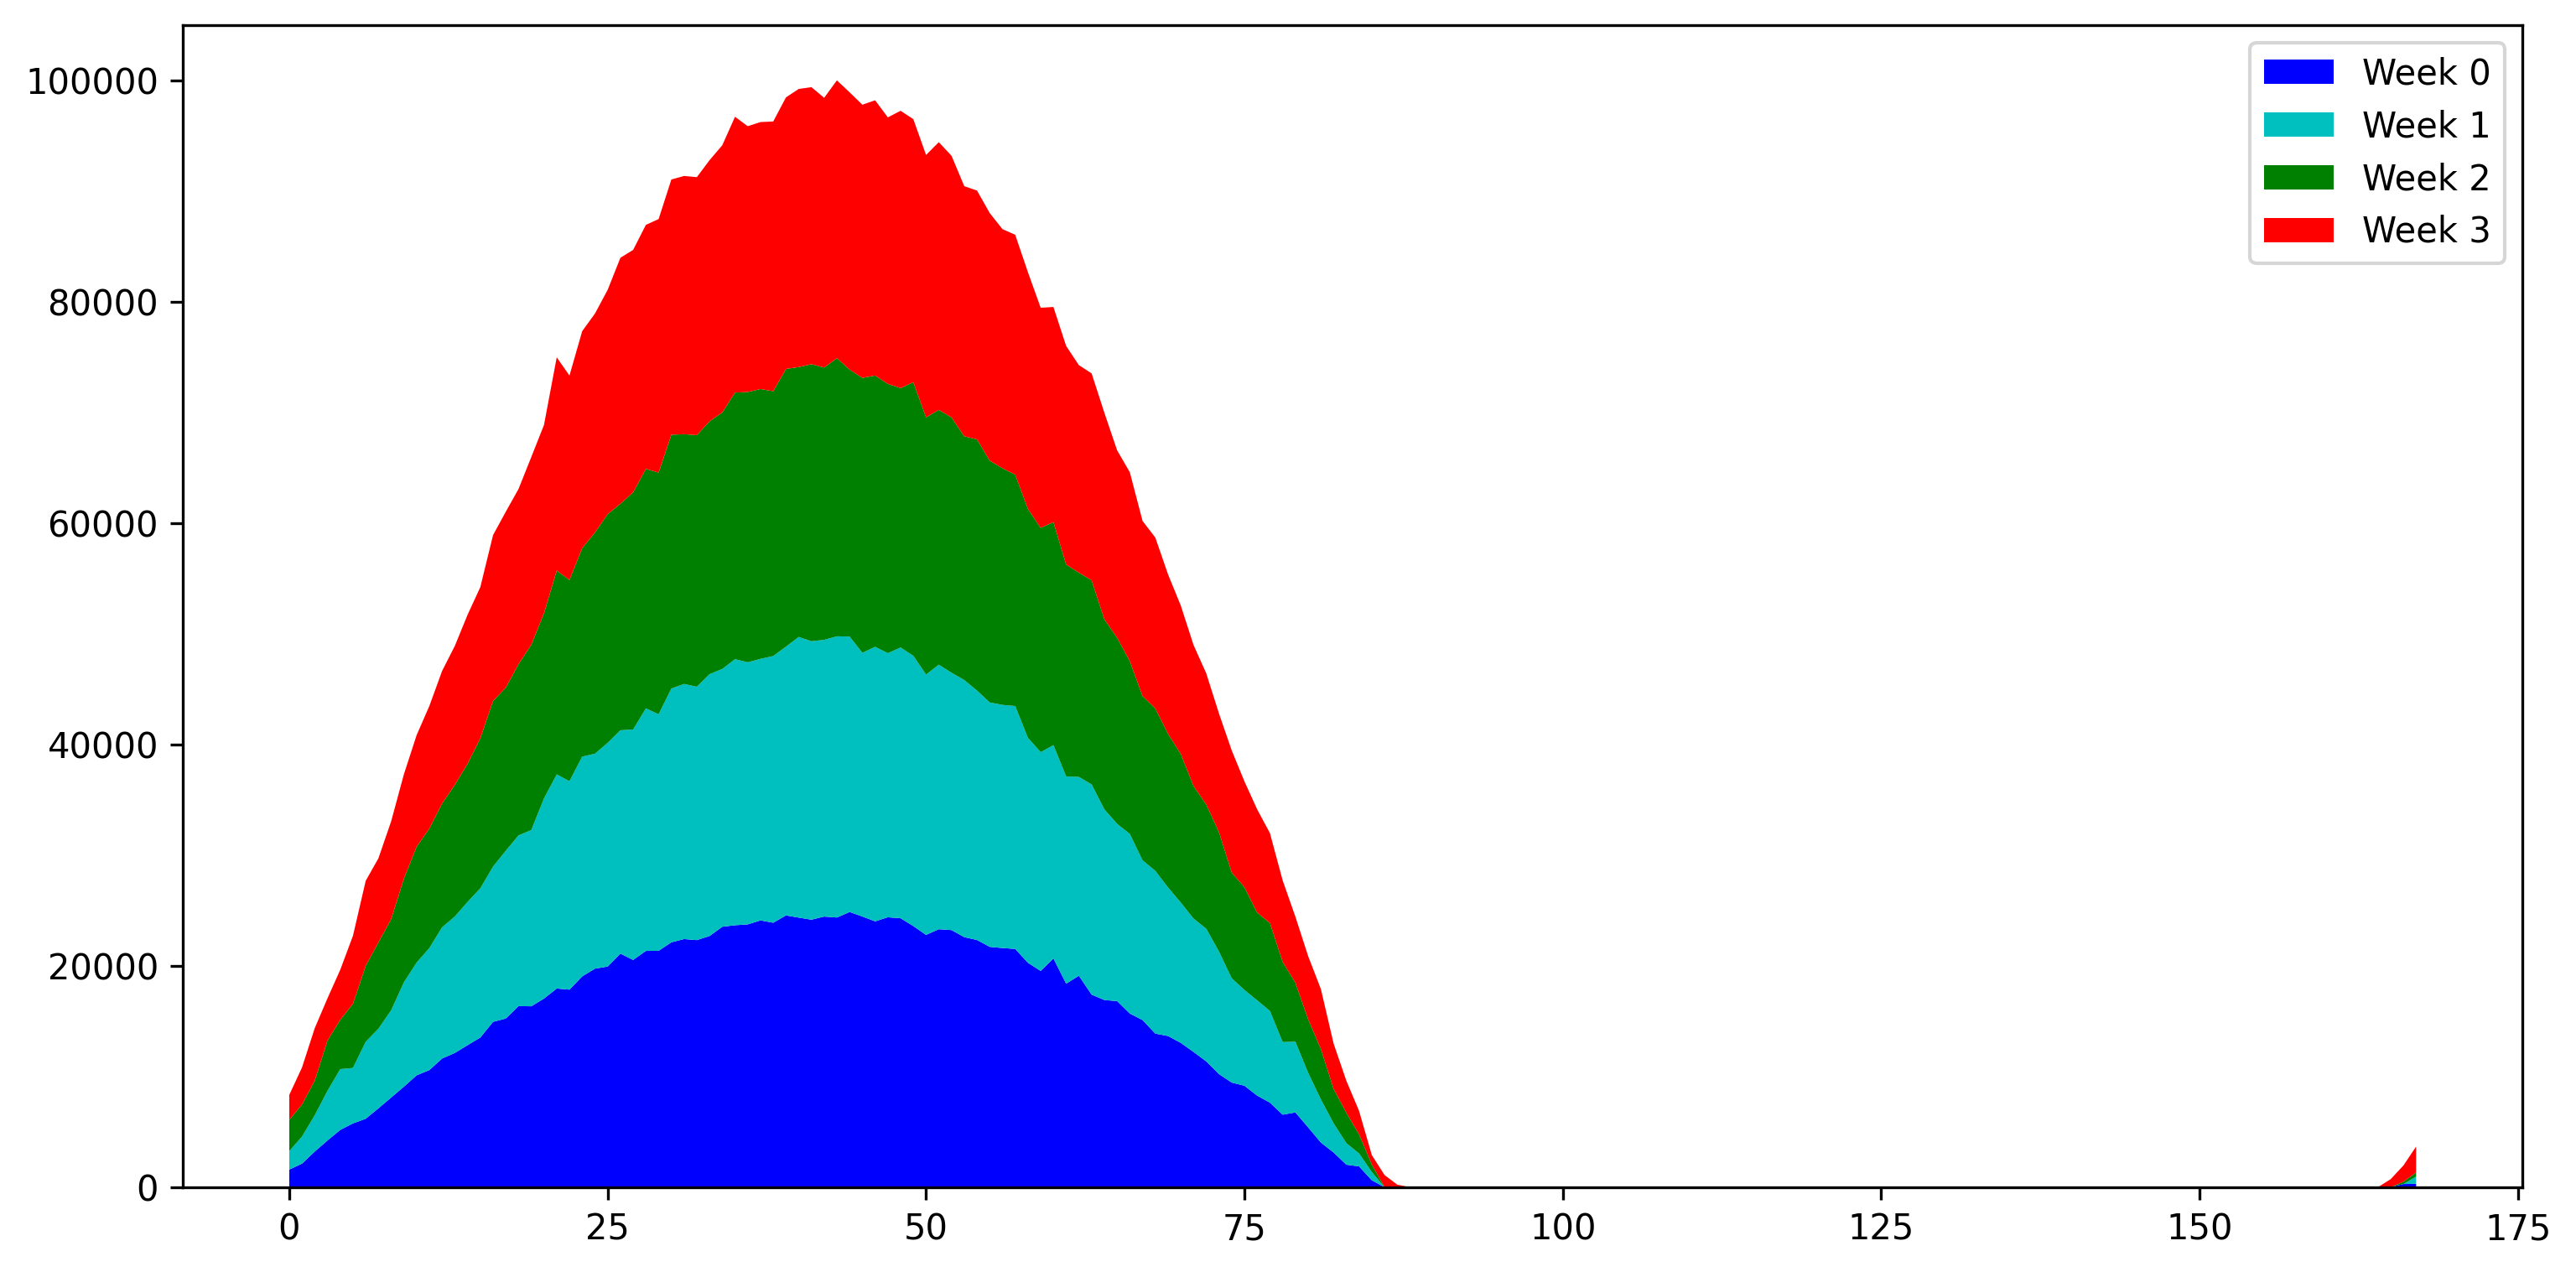

In [26]:
hours_per_week = 7 * 24
plt.figure(figsize=(12,6), dpi=300)
plt.stackplot(range(0,hours_per_week), hits[:hours_per_week], hits[hours_per_week:hours_per_week*2],
             hits[hours_per_week*2:hours_per_week*3], hits[hours_per_week*3:hours_per_week*4],
             labels=[f'Week {i}' for i in range(0,4)],
             colors = ['b', 'c', 'g', 'r'])
plt.legend()
plt.show()

Whether the x axis values are sequential or repeat (as they do in the case of our raw data), we can take data that represents multiple series and create a single stacked graph.  This makes a great deal of sense in this particular case since it allows us to evaluate visually how one week's traffic compares to another's.

You may have detected that the data we are using is somewhat artificial, which is why we have several days of no traffic.  Using real data, we would no doubt see the earlier graphs, the graphs that are closer to us, sometimes obscuring data further back.

# Conclusion

You should now have at least the basics needed to generate useful graphs using matplotlib.  You should also have begun to see some value from our review of Python and numpy arrays.  Obviously, there is more to know.  Even in this section you learned some things about numpy arrays that you likely did not know previously.  In the same way, you will continue to use all of the knowledge so far many times this week.  Especially over the course of the first few days, you will also add to the foundational knowledge as we explore and make use of more and more language and library features.